# Covid Vaccinations vs cases
> Linear regression comparing cases per capita to vaccination rate

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# Purpose
I want to see how much vaccination effects the COVID outbreaks around the US.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [126]:
df = pd.read_csv('data/covid_vax_2021_06_04.csv')
df.head()

,state,Cases Daily Avg.,cases per 100k,14-day change,Hospitalized Daily Avg.,"Per 100,000",14-day change.1,Deaths Daily Avg.,"Per 100,000.1",Fully Vaccinated
0,Vermont ›,8,1,–81%,5,<1,–57%,0.0,—,57
1,South Dakota ›,20,2,–51%,40,5,–34%,2.3,0.26,43
2,Nebraska ›,45,2,–42%,81,4,–25%,1.0,0.05,42
3,California ›,932,2,–29%,1359,3,–18%,26.1,0.07,44
4,New Hampshire ›,32,2,–71%,36,3,–40%,0.7,0.05,50


In [124]:
def plot_vax(df, degree):
    coeffs = np.polyfit(df['Fully  Vaccinated'], df['cases per 100k'], degree)
    p = np.poly1d(coeffs)
    r2 = r2_score(df['cases per 100k'], p(df['Fully  Vaccinated']))

    plt.scatter(df['Fully  Vaccinated'], df['cases per 100k'], color='red')
    plt.plot(range(25,60), p(range(25,60)))
    plt.xlabel('Percent Fully Vaccinated')
    plt.ylabel('Cases per 100k people')
    plt.title(f'US State Cases vs Vaccinations. \n r-squared: {r2.round(3)}')

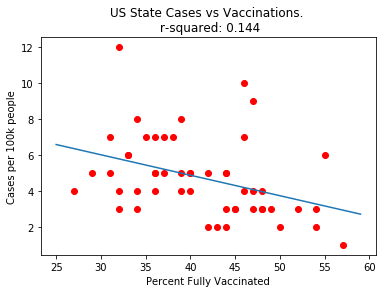

In [108]:
plot_vax(df, 1)

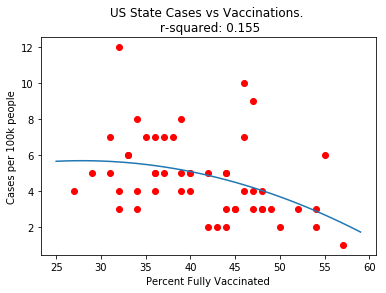

In [109]:
plot_vax(df, 2)

This one is clearly overfitting

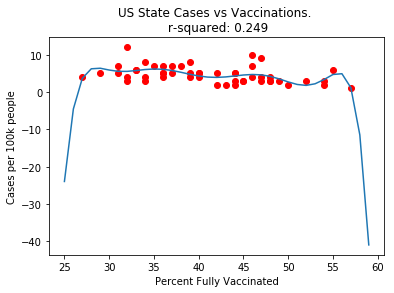

In [119]:
plot_vax(df, 8)

In [120]:
# hide
df = df.set_index('state')[['cases per 100k', 'Fully  Vaccinated']]
df.corr()

,cases per 100k,Fully Vaccinated
cases per 100k,1.000000,-0.379316
Fully Vaccinated,-0.379316,1.000000


In [121]:
# hide
m, b = np.polyfit(df['Fully  Vaccinated'], df['cases per 100k'], 1)

In [122]:
# hide
from sklearn.metrics import r2_score
def fit(x, y, degree=1):
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)            
    return(p, r2_score(y, p(x)))

In [123]:
# hide
a, b = fit(df['Fully  Vaccinated'], df['cases per 100k'], 1)
a(df['Fully  Vaccinated'])

In [26]:
# hide
def polyfit(x, y, degree):
#     results = {}
    coeffs = np.polyfit(x, y, degree)
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    r2 = ssreg / sstot
    return coeffs, r2

In [101]:
# hide
def plot_vax(df, degree):
    coeffs = np.polyfit(df['Fully  Vaccinated'], df['cases per 100k'], degree)
    p = np.poly1d(coeffs)
    plt.scatter(df['Fully  Vaccinated'], df['cases per 100k'], color='red')
    plt.plot(range(25,60), p(range(25,60)))
    plt.xlabel('Percent Fully Vaccinated')
    plt.ylabel('Cases per 100k people')
    r2 = r2_score(df['cases per 100k'], p(df['Fully  Vaccinated']))
    plt.title(f'US State Cases vs Vaccinations. r-squared: {r2.round(3)}')

In [72]:
# hide
p(range(25,60))

array([5.65154647, 5.67088569, 5.68201591, 5.68493713, 5.67964935,
       5.66615257, 5.6444468 , 5.61453202, 5.57640824, 5.53007547,
       5.47553369, 5.41278292, 5.34182314, 5.26265437, 5.17527659,
       5.07968982, 4.97589404, 4.86388927, 4.7436755 , 4.61525272,
       4.47862095, 4.33378018, 4.18073041, 4.01947163, 3.85000386,
       3.67232709, 3.48644132, 3.29234655, 3.09004278, 2.87953001,
       2.66080824, 2.43387747, 2.1987377 , 1.95538894, 1.70383117])

In [128]:
# hide
polyfit(df['Fully  Vaccinated'], df['cases per 100k'], 1)

(array([-0.11422554,  9.44178355]), 0.1438804249626333)

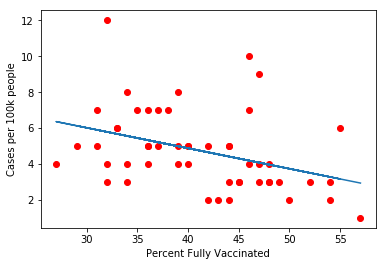

In [129]:
# hide
m, b = np.polyfit(df['Fully  Vaccinated'], df['cases per 100k'], 1)
plt.scatter(df['Fully  Vaccinated'], df['cases per 100k'], color='red')
plt.plot(df['Fully  Vaccinated'], df['Fully  Vaccinated']*m+b)
plt.xlabel('Percent Fully Vaccinated')
plt.ylabel('Cases per 100k people')
plt.savefig('vax_cases_june4.png')